In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Classification Example on kickstarter DataSet

In [56]:
kickstarter = pd.read_csv('kickstarter/ks-projects-201801.csv')

In [57]:
kickstarter=kickstarter.drop('usd_goal_real' , 1)
kickstarter=kickstarter.drop('usd_pledged_real', 1)
kickstarter=kickstarter.drop('usd pledged' , 1)

In [6]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US


In [59]:
def convert(kick):
    if (kick.goal > kick.pledged) & (kick.state != 'failed'):
        return 'failed'
    else:
        return 'successful'
    
kickstarter['state'] = kickstarter.apply(convert , 1)

In [60]:
kickstarter = kickstarter.dropna()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
kickstarter.iloc[:,2] = encoder.fit_transform(kickstarter.iloc[:,2])
kickstarter.iloc[:,3] = encoder.fit_transform(kickstarter.iloc[:,3])
kickstarter.iloc[:,4] = encoder.fit_transform(kickstarter.iloc[:,4])
kickstarter.iloc[:,9] = encoder.fit_transform(kickstarter.iloc[:,9])
kickstarter.iloc[:,11] = encoder.fit_transform(kickstarter.iloc[:,11])

In [61]:
features = kickstarter.iloc[:,[2,3,4,6,8]].values
goal = kickstarter.iloc[:,9].values

In [62]:
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.20,random_state=0)

# Using Linear SVM

In [64]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state = 0)
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8858078487297312


,0,1
0,0,8648
1,0,67084


# Using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

logistic.score(test_set, goal_test)

0.8857814398140812

# Using KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
for K in [1, 3, 5, 10, 20, 100, 150]:
    classifier = KNeighborsClassifier(n_neighbors=K)
    classifier.fit(train_set, goal_train)
    print("model accuracy : {:.4f}".format(classifier.score(test_set, goal_test)))

    cm = confusion_matrix(goal_test, classifier.predict(test_set))
    print('K = %d\n-------------'%K)
    print(pd.DataFrame(cm))
    print('-------------\n\n')

model accuracy : 0.8162
K = 1
-------------
      0      1
0  1849   6799
1  7122  59962
-------------


model accuracy : 0.8491
K = 3
-------------
      0      1
0   964   7684
1  3744  63340
-------------


model accuracy : 0.8657
K = 5
-------------
      0      1
0   648   8000
1  2171  64913
-------------


model accuracy : 0.8739
K = 10
-------------
      0      1
0   483   8165
1  1386  65698
-------------


model accuracy : 0.8837
K = 20
-------------
     0      1
0  114   8534
1  275  66809
-------------


model accuracy : 0.8858
K = 100
-------------
   0      1
0  0   8648
1  0  67084
-------------


model accuracy : 0.8858
K = 150
-------------
   0      1
0  0   8648
1  0  67084
-------------




# Using naive_bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8848043099350341


,0,1
0,40,8608
1,116,66968


# Using DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8221755664712407


,0,1
0,1825,6823
1,6644,60440


# BaggingClassifier

In [73]:
from sklearn.ensemble import BaggingClassifier
# training classifiers
bagging = BaggingClassifier(LogisticRegression(random_state=0))

bagging.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, bagging.predict(test_set))
print(bagging.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8857814398140812


,0,1
0,0,8648
1,2,67082


# Using RandomForestClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

forest.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, forest.predict(test_set))
print(forest.score(test_set, goal_test))  
pd.DataFrame(cm)

0.86206623356045


,0,1
0,973,7675
1,2771,64313


# Using AdaBoostClassifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(n_estimators=100)

adaBoost.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, adaBoost.predict(test_set))
print(adaBoost.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8834970686103628


,0,1
0,248,8400
1,423,66661


# Using GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gradientTree = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gradientTree.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, gradientTree.predict(test_set))
print(gradientTree.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8854777372841072


,0,1
0,100,8548
1,125,66959


# Using XGBClassifier

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, xgb.predict(test_set))
print(xgb.score(test_set, goal_test))  
pd.DataFrame(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8859002799345059


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,11,8637
1,4,67080


# Using StackingClassifier

In [75]:
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

sclf.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, sclf.predict(test_set))
print(sclf.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8683383510273068


,0,1
0,587,8061
1,1910,65174


# Using Hard VotingClassifier

In [76]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = LinearSVC(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('gnb', clf3)], voting='hard')
# Using Hard VotingClassifier
eclf.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, eclf.predict(test_set))
print(eclf.score(test_set, goal_test))  
pd.DataFrame(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8857814398140812


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,0,8648
1,2,67082


--------------------------------------------------------------------------------------------------------------------------------

# Clustering Examples

# Use Kmeans and HC to cluster the generated datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

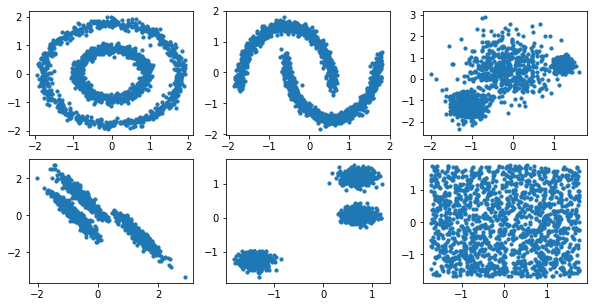

In [3]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    axes[index].scatter(X[:, 0], X[:, 1], s=10)    
    

# Using KMean

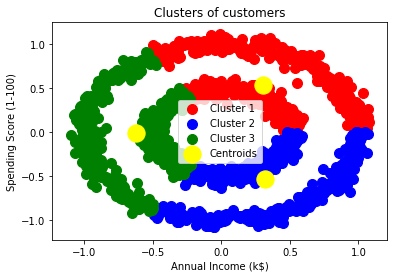

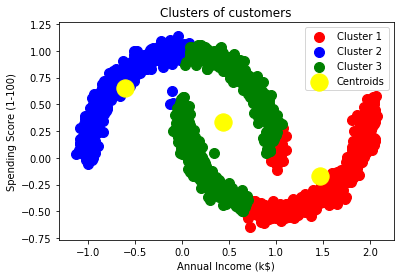

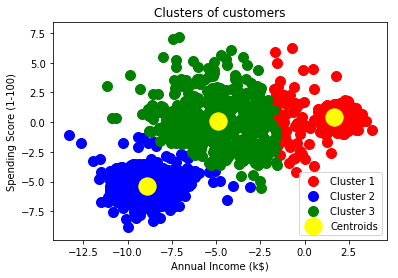

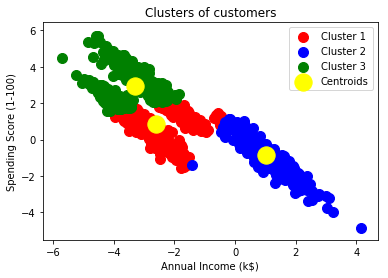

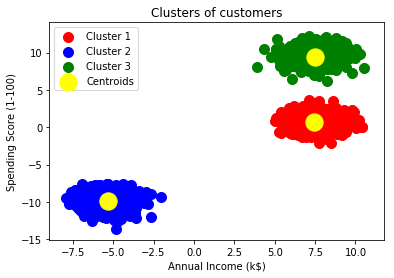

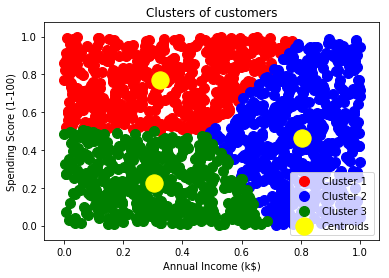

In [13]:
from sklearn.cluster import KMeans
for data in datasets:
    kmeans = KMeans(n_clusters = 3, random_state = 0)
    kmeans_predictions = kmeans.fit_predict(data[0])
    plt.scatter(data[0][kmeans_predictions == 0, 0], data[0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(data[0][kmeans_predictions == 1, 0], data[0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(data[0][kmeans_predictions == 2, 0], data[0][kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

# Using  HC

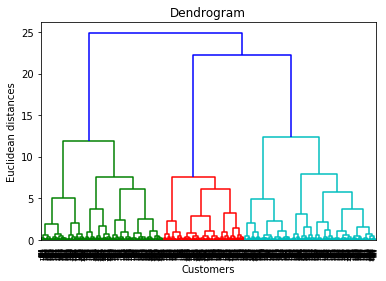

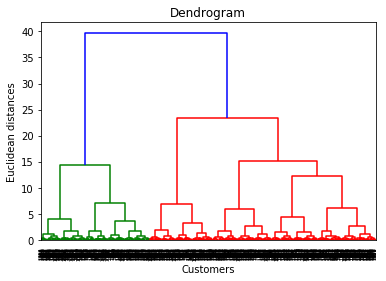

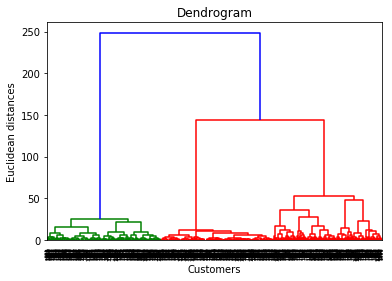

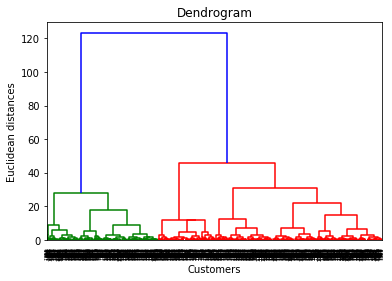

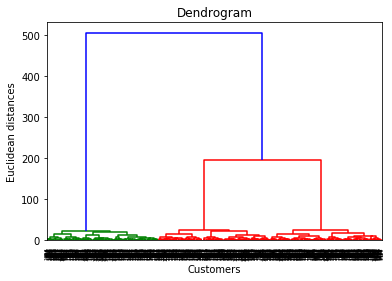

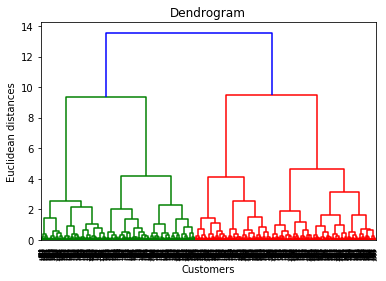

In [17]:
import scipy.cluster.hierarchy as sch

for data in datasets:
    dendrogram = sch.dendrogram(sch.linkage(data[0], method = 'ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

In [17]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [50]:
def clustering_methods(clus_methode):
    
    obj = str_to_class(clus_methode)
    
    print(obj)
    
    plt.figure(1 , figsize = (20,10))

    ##############################DataSet 1################################
    plt.subplot(2,3,1)
    hc = str_to_class(clus_methode)(n_clusters = 2)
    y_hc = hc.fit_predict(datasets[0][0])

    plt.scatter(datasets[0][0][y_hc == 0, 0], datasets[0][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[0][0][y_hc == 1, 0], datasets[0][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    #plt.scatter(datasets[0][0][y_hc == 2, 0], datasets[0][0][y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')

    plt.title('DataSet-1')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()

    ##############################DataSet 2################################
    plt.subplot(2,3,2)
    hc = str_to_class(clus_methode)(n_clusters = 2)
    y_hc = hc.fit_predict(datasets[1][0])

    plt.scatter(datasets[1][0][y_hc == 0, 0], datasets[1][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[1][0][y_hc == 1, 0], datasets[1][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.title('DataSet-2')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()

    ##############################DataSet 3################################
    plt.subplot(2,3,3)
    hc = str_to_class(clus_methode)(n_clusters = 3)
    y_hc = hc.fit_predict(datasets[2][0])

    plt.scatter(datasets[2][0][y_hc == 0, 0], datasets[2][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[2][0][y_hc == 1, 0], datasets[2][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(datasets[2][0][y_hc == 2, 0], datasets[2][0][y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    plt.title('DataSet-3')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()

    ##############################DataSet 4################################
    plt.subplot(2,3,4)
    hc = str_to_class(clus_methode)(n_clusters = 2)
    y_hc = hc.fit_predict(datasets[3][0])

    plt.scatter(datasets[3][0][y_hc == 0, 0], datasets[3][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[3][0][y_hc == 1, 0], datasets[3][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.title('DataSet-4')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()

    ##############################DataSet 5################################
    plt.subplot(2,3,5)
    hc = str_to_class(clus_methode)(n_clusters = 2)
    y_hc = hc.fit_predict(datasets[4][0])

    plt.scatter(datasets[4][0][y_hc == 0, 0], datasets[4][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[4][0][y_hc == 1, 0], datasets[4][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.title('DataSet-5')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()

    ##############################DataSet 6################################
    plt.subplot(2,3,6)
    hc = str_to_class(clus_methode)(n_clusters = 4)
    y_hc = hc.fit_predict(datasets[5][0])

    plt.scatter(datasets[5][0][y_hc == 0, 0], datasets[5][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(datasets[5][0][y_hc == 1, 0], datasets[5][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(datasets[5][0][y_hc == 2, 0], datasets[5][0][y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(datasets[5][0][y_hc == 3, 0], datasets[5][0][y_hc == 3, -1], s = 100, c = 'black', label = 'Cluster 3')
    plt.title('DataSet-6')
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()
    plt.show()

# Using AgglomerativeClustering

<class 'sklearn.cluster.hierarchical.AgglomerativeClustering'>


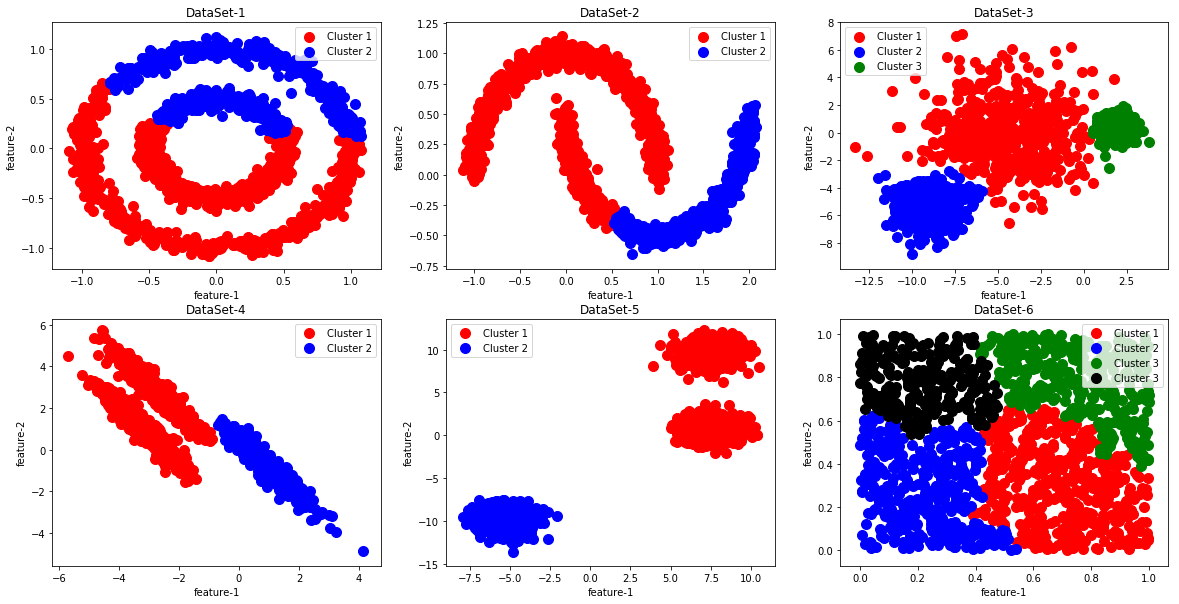

In [51]:
from sklearn.cluster import AgglomerativeClustering

clustering_methods('AgglomerativeClustering')

# Using SpectralClustering

<class 'sklearn.cluster.spectral.SpectralClustering'>


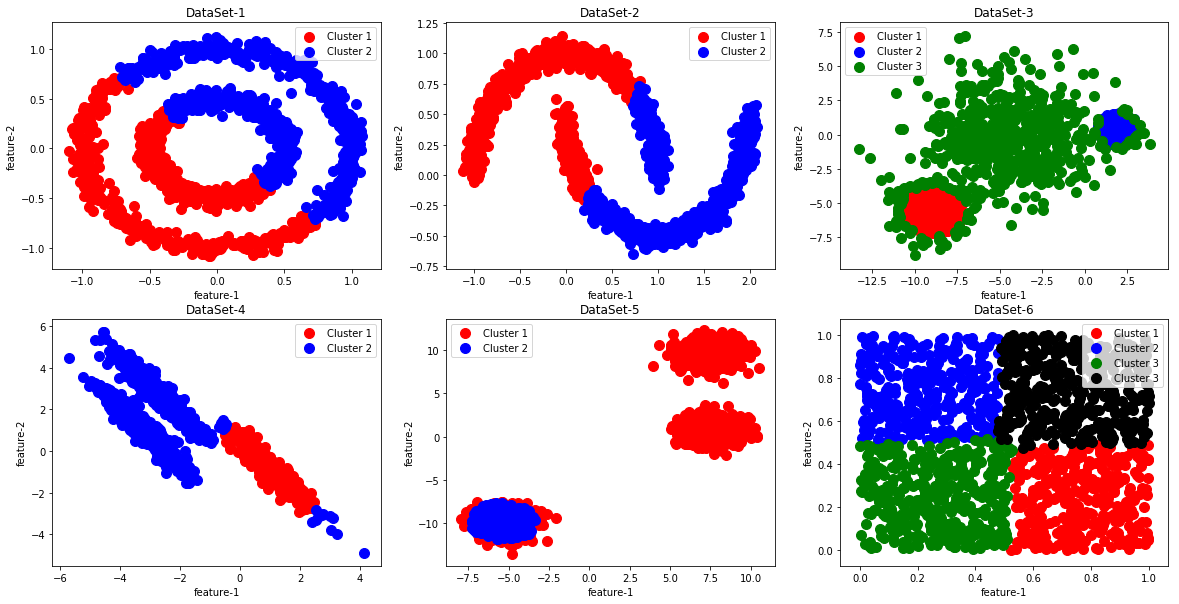

In [52]:
from sklearn.cluster import SpectralClustering

clustering_methods('SpectralClustering')

# Using Birch

<class 'sklearn.cluster.birch.Birch'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters))


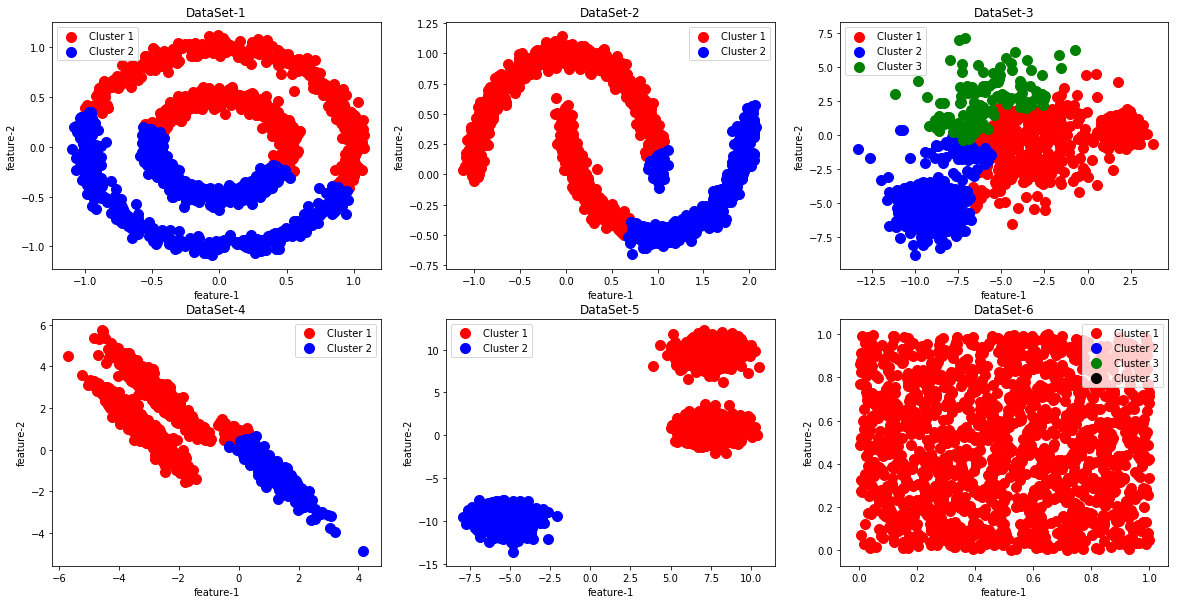

In [53]:
from sklearn.cluster import Birch

clustering_methods('Birch')

# Using MiniBatchKMeans

<class 'sklearn.cluster.k_means_.MiniBatchKMeans'>


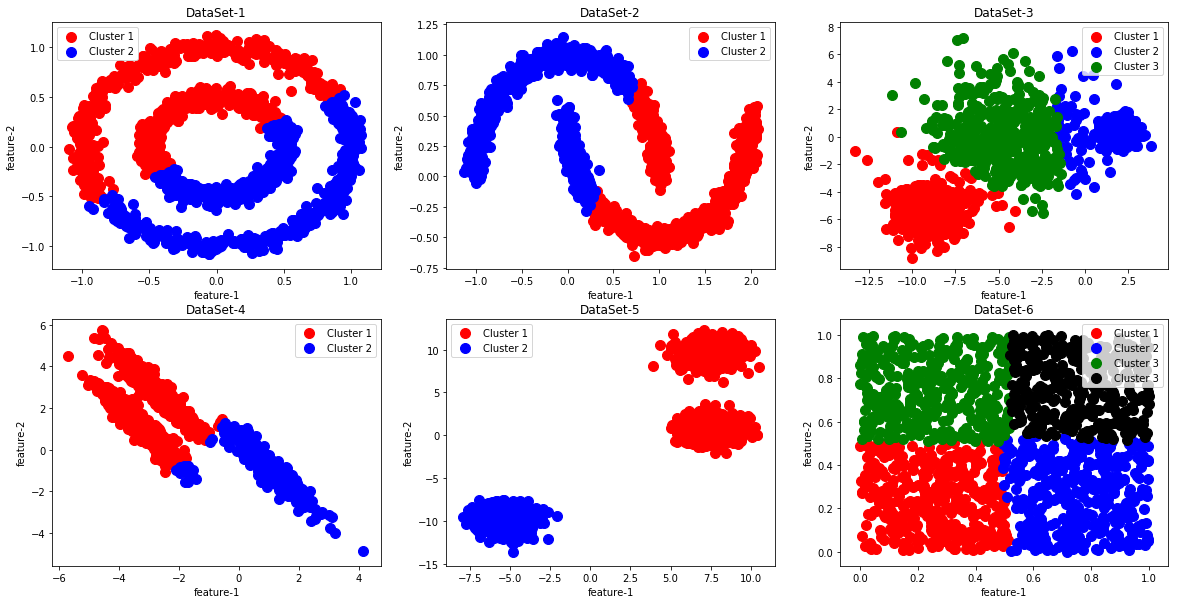

In [54]:
from sklearn.cluster import MiniBatchKMeans

clustering_methods('MiniBatchKMeans')

-------------------------------------------------------------------------------------------------------------------------------

# Classification Example on adult DataSet

# Adults DataSet

In [150]:
adults = pd.read_csv('adult/adult.csv')

In [151]:
adults = adults.dropna()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
adults.iloc[:,1] = encoder.fit_transform(adults.iloc[:,1])
adults.iloc[:,3] = encoder.fit_transform(adults.iloc[:,3])
adults.iloc[:,5] = encoder.fit_transform(adults.iloc[:,5])
adults.iloc[:,6] = encoder.fit_transform(adults.iloc[:,6])
adults.iloc[:,7] = encoder.fit_transform(adults.iloc[:,7])
adults.iloc[:,8] = encoder.fit_transform(adults.iloc[:,8])
adults.iloc[:,9] = encoder.fit_transform(adults.iloc[:,9])
adults.iloc[:,13] = encoder.fit_transform(adults.iloc[:,13])
adults.iloc[:,14] = encoder.fit_transform(adults.iloc[:,14])

features = adults.iloc[:,[0,1,3,4,5,6,7,8,9,10]].values
goal = adults.iloc[:,-1].values

# standrize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features[:,[8]] = scaler.fit_transform(features[:,[8]])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [152]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [153]:
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.20,random_state=0)

# Using Linear SVM

In [154]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state = 0)
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8143712574850299


,0,1
0,4607,311
1,898,697


# Using KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
for K in [1, 3, 5, 10, 20, 100, 150, len(test_set)]:
    classifier = KNeighborsClassifier(n_neighbors=K)
    classifier.fit(train_set, goal_train)
    print("model accuracy : {:.4f}".format(classifier.score(test_set, goal_test)))

    cm = confusion_matrix(goal_test, classifier.predict(test_set))
    print('K = %d\n-------------'%K)
    print(pd.DataFrame(cm))
    print('-------------\n\n')

model accuracy : 0.8041
K = 1
-------------
      0    1
0  4261  657
1   619  976
-------------


model accuracy : 0.8228
K = 3
-------------
      0    1
0  4391  527
1   627  968
-------------


model accuracy : 0.8337
K = 5
-------------
      0    1
0  4439  479
1   604  991
-------------


model accuracy : 0.8419
K = 10
-------------
      0    1
0  4570  348
1   682  913
-------------


model accuracy : 0.8365
K = 20
-------------
      0    1
0  4530  388
1   677  918
-------------


model accuracy : 0.8299
K = 100
-------------
      0    1
0  4539  379
1   729  866
-------------


model accuracy : 0.8240
K = 150
-------------
      0    1
0  4559  359
1   787  808
-------------


model accuracy : 0.7551
K = 6513
-------------
      0  1
0  4918  0
1  1595  0
-------------




# Using Logistic Regretion

In [160]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))

print(logistic.score(test_set, goal_test))
pd.DataFrame(cm)


0.8166743436204514


,0,1
0,4644,274
1,920,675


# Using Naive Bays Gaussian

In [159]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.7988638108398587


,0,1
0,4782,136
1,1174,421


# Using Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8034699831107017


,0,1
0,4336,582
1,698,897


# Using Gaussian SVM

In [162]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
classifier.fit(train_set, goal_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.8309534776600644


,0,1
0,4631,287
1,814,781


# Using BaggingClassifier

In [163]:
from sklearn.ensemble import BaggingClassifier
# training classifiers
bagging = BaggingClassifier(LogisticRegression(random_state=0))

bagging.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, bagging.predict(test_set))
print(bagging.score(test_set, goal_test))  
pd.DataFrame(cm)

0.81759557807462


,0,1
0,4646,272
1,916,679


# Using RandomForestClassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

forest.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, forest.predict(test_set))
print(forest.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8278826961461692


,0,1
0,4453,465
1,656,939


# Using AdaBoostClassifier

In [165]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(n_estimators=100)

adaBoost.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, adaBoost.predict(test_set))
print(adaBoost.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8518347919545525


,0,1
0,4574,344
1,621,974


# Using GradientBoostingClassifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

gradientTree = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gradientTree.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, gradientTree.predict(test_set))
print(gradientTree.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8545984953170582


,0,1
0,4576,342
1,605,990


# Using XGBClassifier

In [167]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, xgb.predict(test_set))
print(xgb.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8515277138031629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,4607,311
1,656,939


# Using StackingClassifier

In [168]:
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

sclf.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, sclf.predict(test_set))
print(sclf.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8272685398433901


,0,1
0,4548,370
1,755,840


# Using Hard VotingClassifier

In [169]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = LinearSVC(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('gnb', clf3)], voting='hard')
# Using Hard VotingClassifier
eclf.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, eclf.predict(test_set))
print(eclf.score(test_set, goal_test))  
pd.DataFrame(cm)

0.8050053738676494


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,4832,86
1,1184,411


# Using Soft VotingClassifier

In [149]:
lr = LogisticRegression(random_state=1)
svc = SVC(kernel='rbf', probability=True)
gnb = GaussianNB()

voting = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('gnb', gnb)], voting='soft', weights=[2,1,2])

voting.fit(train_set, goal_train)

cm = confusion_matrix(goal_test, voting.predict(test_set))
print(voting.score(test_set, goal_test))  
pd.DataFrame(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8215875940426839


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,4708,210
1,952,643
